# 1 Chemical composition of pottery


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler

## 1.1 Data exploration with PCA

### 1.1.1

In [2]:
# import the data
Pottery_df = pd.read_csv("Pottery.csv")

In [3]:
# get the number of columns and rows in the data provided
Pottery_df.shape 

(26, 7)

In [4]:
# view the data
Pottery_df

,Unnamed: 0,Site,Al,Fe,Mg,Ca,Na
0,1,Llanedyrn,14.4,7.00,4.30,0.15,0.51
1,2,Llanedyrn,13.8,7.08,3.43,0.12,0.17
2,3,Llanedyrn,14.6,7.09,3.88,0.13,0.20
3,4,Llanedyrn,11.5,6.37,5.64,0.16,0.14
4,5,Llanedyrn,13.8,7.06,5.34,0.20,0.20
5,6,Llanedyrn,10.9,6.26,3.47,0.17,0.22
6,7,Llanedyrn,10.1,4.26,4.26,0.20,0.18
7,8,Llanedyrn,11.6,5.78,5.91,0.18,0.16
8,9,Llanedyrn,11.1,5.49,4.52,0.29,0.30
9,10,Llanedyrn,13.4,6.92,7.23,0.28,0.20


There are 7 columns in the data provided.

The columns that will be used in the PCA include:"Al", "Fe", "Mg", "Ca", and "Na". All the numerical features provided in the dataset.

### 1.1.2

#### preprocessing

In [5]:
# preprocess the dataset: first drop the columns thats not needed for PCA
Pottery_preprocessed_df = Pottery_df.drop(columns = ["Unnamed: 0", "Site"])
# view the modified dataframe
Pottery_preprocessed_df

,Al,Fe,Mg,Ca,Na
0,14.4,7.00,4.30,0.15,0.51
1,13.8,7.08,3.43,0.12,0.17
2,14.6,7.09,3.88,0.13,0.20
3,11.5,6.37,5.64,0.16,0.14
4,13.8,7.06,5.34,0.20,0.20
5,10.9,6.26,3.47,0.17,0.22
6,10.1,4.26,4.26,0.20,0.18
7,11.6,5.78,5.91,0.18,0.16
8,11.1,5.49,4.52,0.29,0.30
9,13.4,6.92,7.23,0.28,0.20


In [6]:
# create a scaler object for scaling that data
scaler = StandardScaler()
# preprocess the dataset: Scale and mean center the data
Pottery_scaled_df = scaler.fit_transform(Pottery_preprocessed_df)
Pottery_scaled_df

array([[-0.03145568,  1.07166989,  0.54199637,  0.03487194,  2.64999905],
       [-0.23591756,  1.1055258 ,  0.13495926, -0.26735151,  0.08698028],
       [ 0.03669829,  1.10975779,  0.3454957 , -0.16661036,  0.31312899],
       [-1.01968814,  0.80505457,  1.1689271 ,  0.13561308, -0.13916844],
       [-0.23591756,  1.09706182,  1.02856948,  0.53857767,  0.31312899],
       [-1.22415003,  0.75850268,  0.15367361,  0.23635423,  0.4638948 ],
       [-1.49676588, -0.08789516,  0.52328202,  0.53857767,  0.16236318],
       [-0.98561116,  0.5553672 ,  1.29524897,  0.33709538,  0.01159737],
       [-1.15599607,  0.43263951,  0.6449253 ,  1.44524799,  1.06695804],
       [-0.37222549,  1.03781397,  1.91282252,  1.34450685,  0.31312899],
       [-0.71299531,  0.70348682,  1.19232004,  0.74005996,  2.87614776],
       [-0.47445644,  0.91931828,  1.10810547,  1.64673029,  0.61466061],
       [-0.61076436,  0.94047822,  0.61217519,  0.53857767,  0.4638948 ],
       [-0.67891832,  0.83467849,  0.3

In [7]:
# check the means of the preprocessed feature data 
Pottery_scaled_df.mean(axis = 0)

array([5.12410627e-17, 1.70803542e-17, 4.27008856e-17, 3.84307970e-17,
       5.97812398e-17])

In [8]:
# check the standard deviation of the preprocessed feature data 
Pottery_scaled_df.std(axis = 0)

array([1., 1., 1., 1., 1.])

#### PCA

In [9]:
# create a PCA object with 3 PCs
pca = PCA(n_components=3, svd_solver='full')
# Apply PCA to the pre-processed scaled data
pca_scores = pca.fit_transform(Pottery_scaled_df)
# get the scores of the PCA 
scores_pd = pd.DataFrame(data = pca_scores
                         ,columns = ['PC1', 'PC2', 'PC3']
                         ,index = Pottery_preprocessed_df.index)
# view the scores
scores_pd

,PC1,PC2,PC3
0,-1.778026,2.289445,-0.075289
1,-0.611193,0.122065,-0.499044
2,-0.722428,0.370209,-0.207550
3,-1.417696,-0.555600,-0.557590
4,-1.486801,-0.004081,0.195248
5,-1.259044,-0.092347,-0.783259
6,-1.180703,-0.607921,-0.575010
7,-1.490385,-0.498745,-0.336582
8,-2.076010,0.000500,0.220714
9,-2.311320,-0.376341,0.800851


In [10]:
# get the loadings of the PCA 
loadings_pd = pd.DataFrame(data = pca.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3']
                           ,index = Pottery_preprocessed_df.columns)
# view the loadings
loadings_pd

,PC1,PC2,PC3
Al,0.445434,0.356524,0.694985
Fe,-0.478132,0.041175,-0.157338
Mg,-0.486541,-0.049607,0.158560
Ca,-0.449054,-0.344146,0.683443
Na,-0.366888,0.866197,0.002043


### 1.1.3

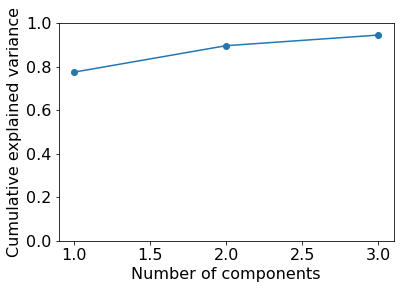

In [11]:
plt.plot(range(1,pca.n_components+1), np.cumsum(pca.explained_variance_ratio_),'-o')
plt.xlabel('Number of components', fontsize=16)
plt.ylabel('Cumulative explained variance', fontsize=16);
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [12]:
np.cumsum(pca.explained_variance_ratio_)

array([0.7755594 , 0.89732137, 0.9461598 ])

In [13]:
pca.explained_variance_ratio_

array([0.7755594 , 0.12176197, 0.04883844])

Cumulatively variance explained
*   PC1 describes 77.55594%
*   PC2 describes 89.732137%
*   PC3 describes 94.61598%

Individual variance explained
*   PC1 describes 77.55594%
*   PC2 describes 12.176197%
*   PC3 describes 4.883844%




### 1.1.4

In [14]:
def myplot(scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    xt = scores[:,0]
    yt = scores[:,1]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max() - xt.min())
    scaleyt = 1.0/(yt.max() - yt.min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    # set different colors for different sites
    colors = {'Llanedyrn' : 'b',
              'Caldicot' : 'y',
              'IsleThorns' : 'r', 
              'AshleyRails' : 'c'}
    #plt.scatter(xs * scalex,ys * scaley, s=10)
    for (x,y), label in zip(np.vstack((xt_scaled, yt_scaled)).T,score_labels):
        plt.text(x, y, label, ha='center', size=11, color=colors[label])
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

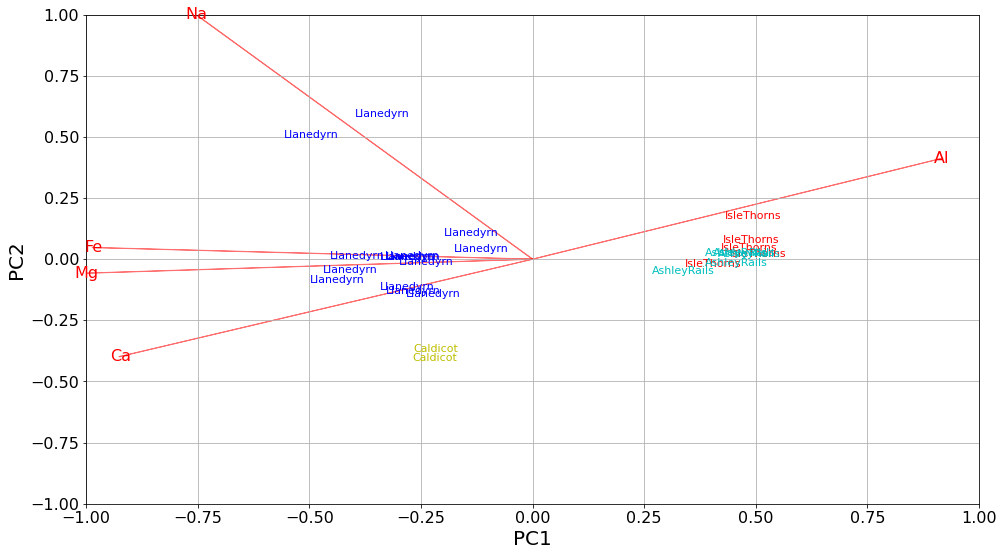

In [15]:
# set figure size
plt.rcParams["figure.figsize"] = [16,9]
# plot the socres-loadings graph for PC1-PC2, Visualize the different sites with a different colour or symbol.
myplot(pca_scores[:,:2],loadings_pd.iloc[:,:2],loading_labels=loadings_pd.index,score_labels=Pottery_df["Site"])
# show the figure
plt.show()

### 1.1.5

Isle Thorns and Ashley Rails' raw material sample composition are slightly different than Caldicot and Llanedyrn's raw material samples. 

*   Isle Thorns and Ashley Rails' raw materials are high in Al compared to Caldicot and Llanedyrn's raw materials.

*   Llanedyrn's raw materials are higher in Ca, Mg, Fe, and Na compared to Isle Thorns and Ashley Rails' raw materials.

*   Caldicot's raw materials are higher in Ca, Mg, and Fe compared to Isle Thorns and Ashley Rails' raw materials.

*   Caldicot, Isle Thorns and Ashley Rails' raw materials are similar in Na.

Product B may perfer Isle Thorns and Ashley Rails' raw material over Caldicot and Llanedyrn's raw material due to this difference in chemical composition.

Isle Thorns and Ashley Rails' raw material more consistant than Llanedyrn's raw material On the scores-loadings map, Isle Thorns and Ashley Rails's raw material samples are plotted in a much tigher cluster compared to Llanedyrn's raw material samples.


### 1.1.6

Yes, Caldicot a good replacement for Llanedyrn given that Caldicot is the only option left. Compared to Isle Thorns and Ashley Rails' raw material, Caldicot's raw materials are more similar to Llanedyrn's raw material.

*   Caldicot's raw materials sample points are close to Llanedyrn's raw materials sample points in terms of distance on the scores-loadings map. Much closer when compared to Isle Thorns and Ashley Rails' raw material sample points. Meaning that Caldicot's raw materials' chemical composition is similar to Llanedyrn's raw materials.


### 1.1.7

Biggest differences between the two big clusters are captured in PC1. From the scores-loadings map it is clear that (1) Ca and Al are negatively correlated and (2) Fe and Mg are positively correlated. Isle Thorns and Ashley Rails'cluster have higher Al compared to Caldicot and Llanedyrn's cluster. Thorns and Ashley Rails'cluster have lower Fe, Mg, and Ca compared to Caldicot and Llanedyrn's cluster. Corresponding to the linear combination of the PC1 loadings values.

Caldicot's raw materials has alot less Na when compared to Llanedyrn's raw material. Other than Na, Caldicot's raw material is fairly similar to Llanedyrn's raw material.

### 1.1.8

In [16]:
# create plotting dataframe
Pottery_boxplot_df = Pottery_df.drop(columns = ["Unnamed: 0"])

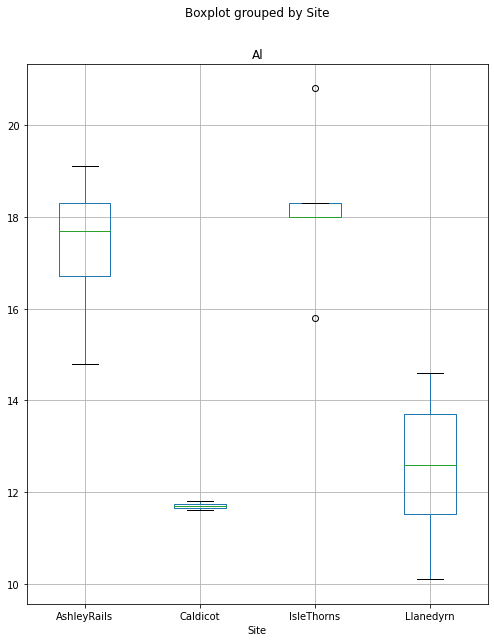

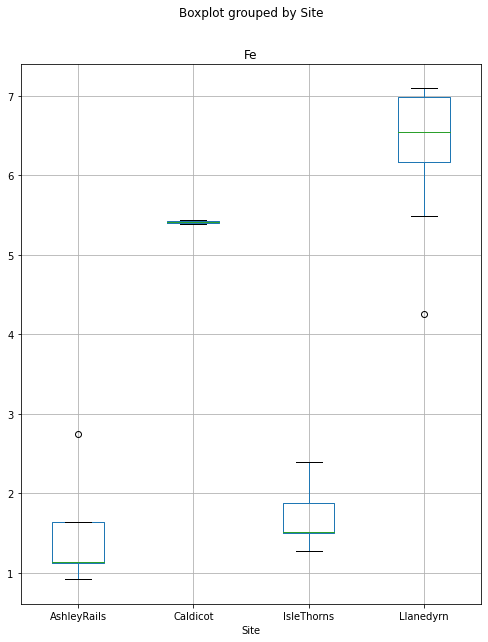

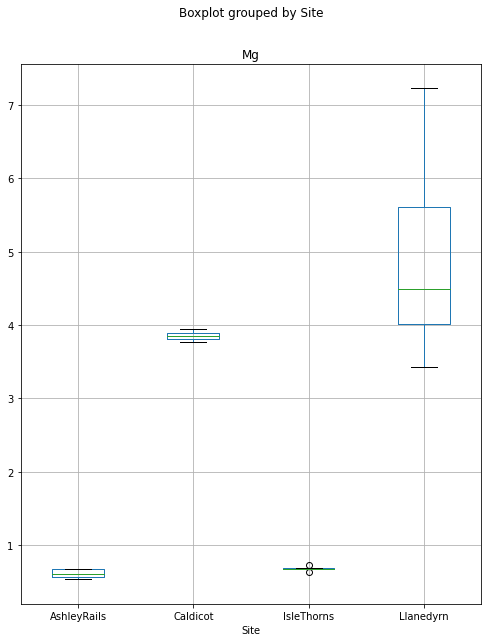

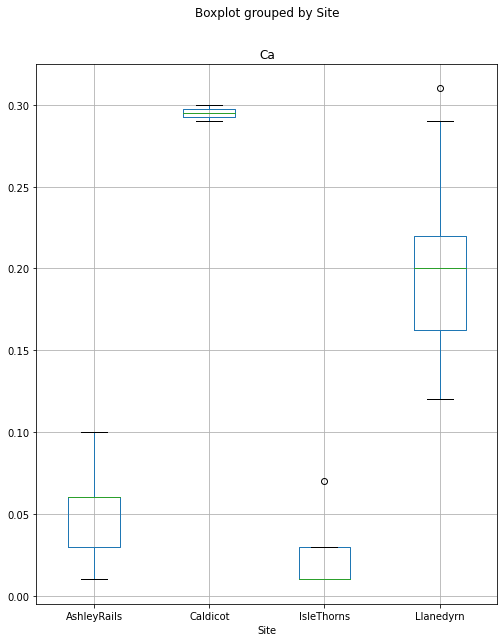

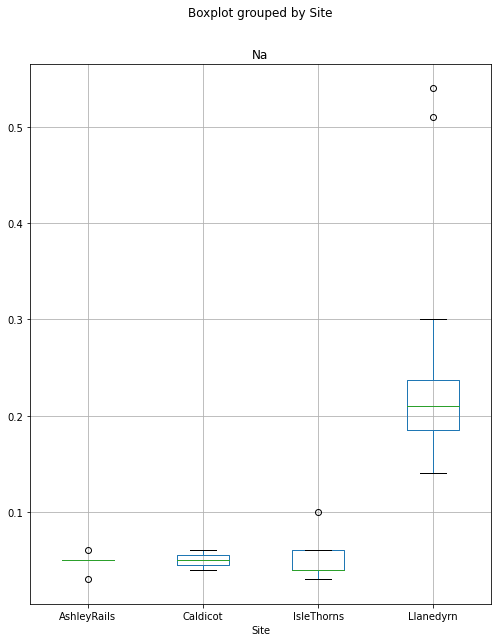

In [17]:
# ignore warnings
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)   
# a box plot for each element   
for i in ["Al","Fe","Mg","Ca","Na"]:
  # groupby sites and plot
  Pottery_boxplot_df.boxplot(column = i, by = "Site", figsize = (8,10))

**Material Composition**

By Al’s box-plot it is clear that Isle Thorns and Ashley Rails' raw materials have higher composition of Al compared to Caldicot and Llanedyrn's raw materials.

By Fe’s box-plot it is clear that Isle Thorns and Ashley Rails' raw materials have lower composition of Fe compared to Caldicot and Llanedyrn's raw materials.

By Mg’s box-plot it is clear that Isle Thorns and Ashley Rails' raw materials have lower composition of Mg compared to Caldicot and Llanedyrn's raw materials.

By Ca’s box-plot it is clear that Isle Thorns and Ashley Rails' raw materials have lower composition of Ca compared to Caldicot and Llanedyrn's raw materials.

By Na’s box-plot it is clear that Isle Thorns, Caldicot and Ashley Rails' raw materials have lower composition of Na compared to Llanedyrn's raw materials.

**Material Composition Consistancy**

Caldicot’s raw materials have good control in terms of the chemical consistency(variance) across all chemicals tested; given the two samples provided.

Isle Thorns and Ashley Rails' raw materials have good control in terms of the chemical consistency(variance) in Na and Mg. Moderate chemical consistency in Ca, Fe, and Al.  

Llanedyrn's raw materials have less chemical consistency compare across all chemical tested compared to the 3 other sites.

**All answers above confirmed**

# 2 Batch data analysis

## 2.1 Build a Batch Statistical Process Control model

### 2.1.1

In [18]:
# import the reference data
reference_batches_df = pd.read_excel("bakers_yeast_reference_batches.xlsx")

In [19]:
# view the reference data
reference_batches_df

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,249,250,bb,0.000000,0.05059,31.9580,212.32800,6.16453,1382.19,43.4194,5.85607
1,250,251,bb,0.166667,0.04930,31.5303,835.47600,29.78270,2084.42,43.4853,5.34603
2,251,252,bb,0.333333,0.04973,30.8220,910.15500,32.50710,2266.47,43.5628,5.18718
3,252,253,bb,0.500000,0.04915,30.1617,985.01100,36.37100,2446.84,43.6002,5.18043
4,253,254,bb,0.666667,0.04744,29.8891,1052.45000,39.26990,2636.96,43.6572,5.18145
...,...,...,...,...,...,...,...,...,...,...,...
1323,2568,2569,Xa,13.000000,0.00784,32.6918,386.12800,0.01424,6736.81,57.3615,6.15868
1324,2569,2570,Xa,13.166700,0.00652,32.7386,96.28380,0.00000,6742.49,57.4025,6.25613
1325,2570,2571,Xa,13.333300,0.00643,32.8174,44.09750,0.00712,6734.69,57.2948,6.31553
1326,2571,2572,Xa,13.500000,0.00644,32.8268,10.43010,-0.00356,6202.63,57.3891,6.34270


In [20]:
# identify the unique batches
reference_batches_df["BatchID"].unique()

array(['bb', 'cb', 'db', 'eb', 'fb', 'gb', 'hb', 'ib', 'jb', 'kb', 'lb',
       'Ma', 'Na', 'Ta', 'Va', 'Xa'], dtype=object)

In [21]:
# calculate the number of batches
len(reference_batches_df["BatchID"].unique())

16

There are 16 batches in the data.

In [22]:
# group the data by batchID and get the max time and datapoint count for each batch
reference_batches_EDA_df = reference_batches_df[["BatchID","Time"]].groupby(["BatchID"]).agg(["max","count"])
# view the results
reference_batches_EDA_df

Time      
             max count
BatchID               
Ma       13.6667    83
Na       13.6667    83
Ta       13.6667    83
Va       13.6667    83
Xa       13.6667    83
bb       13.6667    83
cb       13.6667    83
db       13.6667    83
eb       13.6667    83
fb       13.6667    83
gb       13.6667    83
hb       13.6667    83
ib       13.6667    83
jb       13.6667    83
kb       13.6667    83
lb       13.6667    83

All 16 batches have the duration of 13.6667 and 83 data points.

There are 8 variables measured.

Time, Ethanol, Temperature, Molasses flow, NH3 flow, Air flow, Level, and pH

### 2.1.2

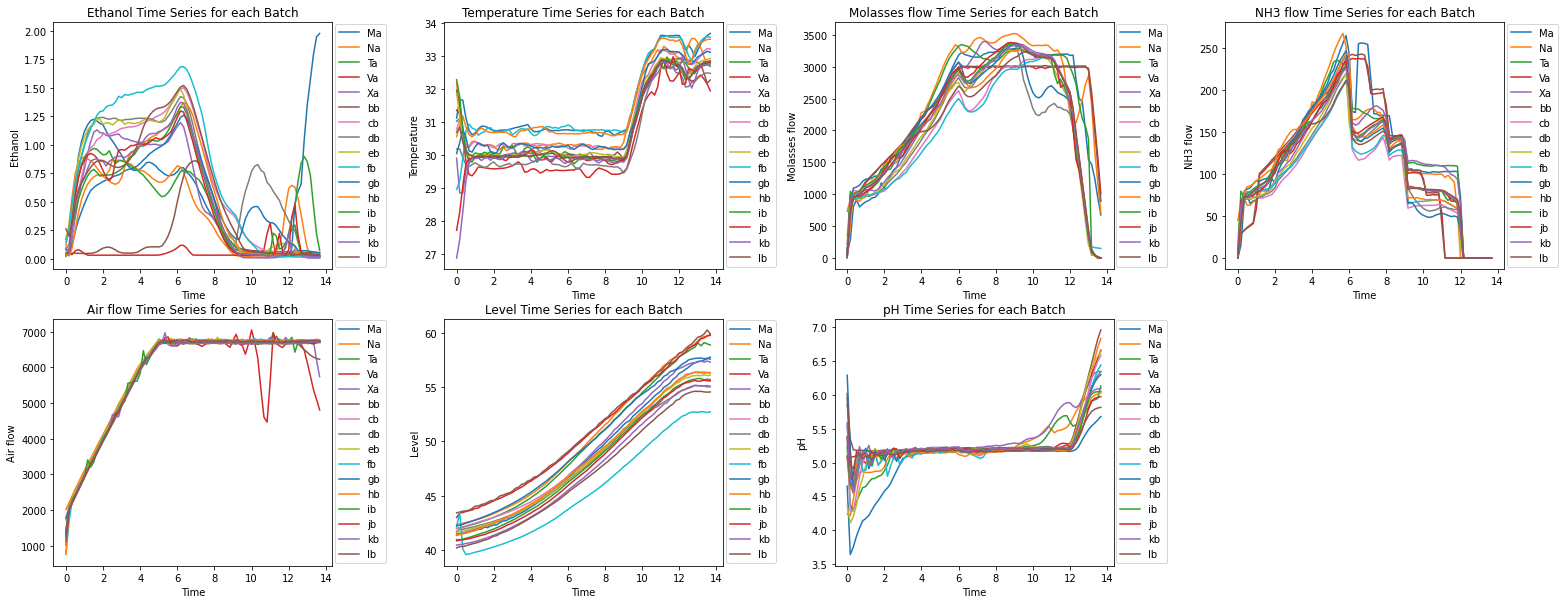

In [23]:
# set up subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,10))
# adjust the spacing between subplots
fig.subplots_adjust(wspace=.4)
# set starting subplot index
subplot_position = 0
# flatten subplot's 2D index to 1D
axes = axes.ravel()
# plot each feature
for feature in np.array(reference_batches_df.columns)[4:]:
  # group the data by BatchID
  for batch, group in reference_batches_df.groupby('BatchID'):
    # plot the grouped data
    group.plot(x='Time', y=feature, label = batch, ax = axes[subplot_position])
    # plot labelling
    axes[subplot_position].legend(loc=(1.01, 0.01), ncol=1)
    axes[subplot_position].set_xlabel("Time")
    axes[subplot_position].set_ylabel(feature)
    axes[subplot_position].set_title(feature + " Time Series for each Batch")
  # update subplot position
  subplot_position = subplot_position +1
# remove the extra subplot
fig.delaxes(axes[7])

"Ethanol" seems to have the largest variability compared to the other features. Values between different batches at a given time point varies more than other features.

By visual inspection "Air flow" is the variable thats the most tighly controlled. Lines plotted that represent different batches are very concentrated.

"pH" has some variability at the start and end of each batch, but is very concentrated in the middle sections.

"Level"'s variability is very consistant throughou the entire process.

"Molasses flow" and "NH3 flow" have a general shape that most batch follows; with some variability

"Temperature" has some variability at the start and end of each batch, with consistant variability in the middle sections.

**By visual inspection there seems to be a few batches that can be considered as potential outliers to the rest of the batches**

### 2.1.3

#### Pre-process

In [24]:
# drop the columns not needed for PCA
reference_batches_PCA_df = reference_batches_df.drop(columns = ["Unnamed: 0","Primary ID","BatchID"])
# create scaler object
scaler_reference = StandardScaler()
# standardize the data
reference_batches_PCA_scaled_df = scaler_reference.fit_transform(reference_batches_PCA_df)

In [25]:
# check mean at 0
reference_batches_PCA_scaled_df.mean(axis = 0)

array([-1.01658976e-16,  5.35047241e-17,  1.08614590e-15,  0.00000000e+00,
       -7.49066137e-17,  1.09015875e-16,  6.15304327e-16,  1.43258899e-15])

In [26]:
# check standard deviation equals 1
reference_batches_PCA_scaled_df.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

#### PCA

In [27]:
# create PCA object
pca_reference = PCA(n_components=5, svd_solver='full')
# run PCA
pca_reference_scores = pca_reference.fit_transform(reference_batches_PCA_scaled_df)
# extract scores
scores_reference_pd = pd.DataFrame(data = pca_reference_scores
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = reference_batches_PCA_df.index)
# view scores
scores_reference_pd

,PC1,PC2,PC3,PC4,PC5
0,-0.808176,4.508288,-0.200368,1.295502,-0.754945
1,-1.303347,3.391210,0.824346,0.666865,-0.552935
2,-1.630004,3.073121,1.085677,0.706676,-0.168488
3,-1.790453,2.816650,1.059588,0.979711,0.160562
4,-1.811100,2.636318,1.033483,1.094550,0.294213
...,...,...,...,...,...
1323,3.772295,2.368292,-1.644665,0.830572,-0.163892
1324,3.875235,2.595895,-1.942104,0.980115,-0.265168
1325,3.963794,2.665704,-2.074648,1.041445,-0.323446
1326,3.900935,2.872436,-2.046092,1.108283,-0.312934


In [28]:
# extract loadings
loadings_reference_pd = pd.DataFrame(data = pca_reference.components_.T
                           ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                           ,index = reference_batches_PCA_df.columns)
# view loadings
loadings_reference_pd

,PC1,PC2,PC3,PC4,PC5
Time,0.471425,-0.115005,-0.073487,-0.109928,0.166210
Ethanol,-0.315056,-0.164245,-0.630171,-0.587107,0.255200
Temperature,0.399243,0.203158,0.051128,-0.540846,-0.647797
Molasses flow,0.127401,-0.608623,0.366748,-0.045936,0.239382
NH3 flow,-0.254209,-0.542698,-0.115348,0.249949,-0.618487
Air flow,0.318021,-0.481637,-0.256120,-0.079962,-0.044048
Level,0.472402,-0.064508,0.060503,-0.001973,0.210803
pH,0.337563,0.132078,-0.614657,0.528890,-0.037395


### 2.1.4

In [29]:
# re-assign BatchID to the scores
scores_reference_pd["BatchID"] = reference_batches_df["BatchID"]
# re-assign Time to the scores
scores_reference_pd["Time"] = reference_batches_df["Time"]
# pivot the table with column BatchID and index Time
scores_reference_pivot_pd = scores_reference_pd.pivot_table(index = "Time", columns = "BatchID")
# view the pivot table
scores_reference_pivot_pd

PC1                      ...       PC5                    
BatchID          Ma        Na        Ta  ...        jb        kb        lb
Time                                     ...                              
0.000000  -2.575226 -2.494768 -1.834810  ...  1.438659  1.833015 -0.111854
0.166667  -3.406333 -2.944182 -2.731785  ...  0.774914  1.236314 -0.332924
0.333333  -3.390333 -3.070940 -3.117042  ...  0.456887  0.850361 -0.270976
0.500000  -3.534499 -2.888284 -3.194946  ...  0.199308  0.471139 -0.038183
0.666667  -3.596972 -2.732277 -3.165646  ...  0.218693  0.224946  0.038438
...             ...       ...       ...  ...       ...       ...       ...
13.000000  2.489762  4.277071  3.184812  ... -0.126855 -0.147775 -0.175886
13.166700  2.481818  4.552587  3.157697  ... -0.242682 -0.292980 -0.289735
13.333300  2.421492  4.641010  3.372776  ... -0.286531 -0.326307 -0.334636
13.500000  2.397535  4.702980  3.579729  ... -0.338967 -0.322784 -0.355440
13.666700  2.442108  4.826890  3.850841  ... -0.322251 -0.327004 -0.367125

[83 rows x 80 columns]

### 2.1.5

In [30]:
def myplot2(scores,loadings,loading_labels=None):
    # adjusting the scores to fit in (-1,1)
    # modified to work with pandas dataframe
    xt = scores.iloc[:,:16]
    yt = scores.iloc[:,16:32]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max().max() - xt.min().min())
    scaleyt = 1.0/(yt.max().max() - yt.min().min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt
    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    # modified to plot lines rather than text
    for j in range(xt_scaled.shape[1]):
      plt.plot(xt_scaled.iloc[:,j:j+1], yt_scaled.iloc[:,j:j+1])
    
    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

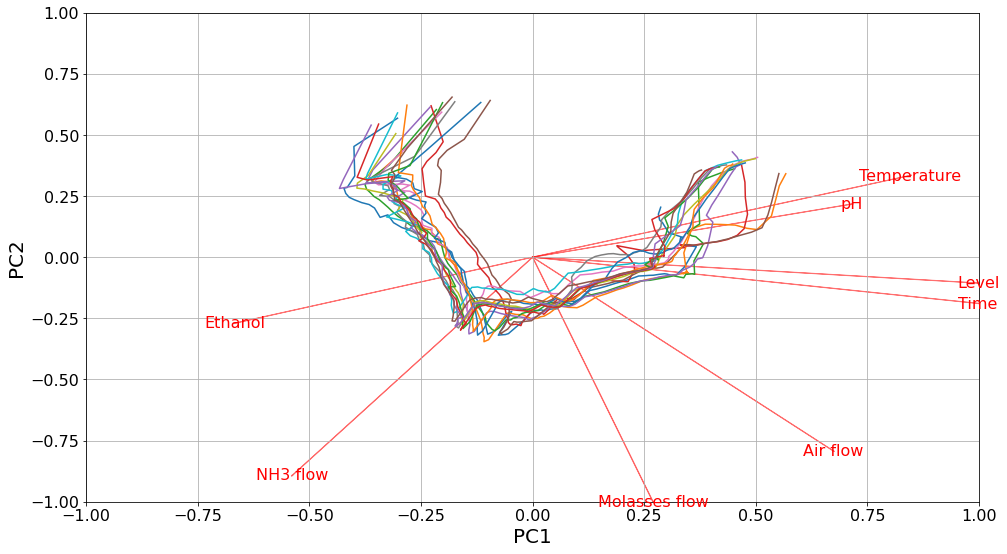

In [31]:
# set figure size
plt.rcParams["figure.figsize"] = [16,9]
# plot the results
myplot2(scores_reference_pivot_pd.iloc[:,:32],loadings_reference_pd.iloc[:,:2],loading_labels=loadings_reference_pd.index)
# show the plot
plt.show()

### 2.1.6

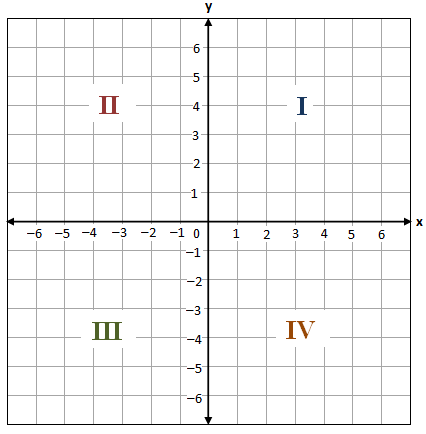

**By quadrants of coordinate plane (figure provided above), the batches start in the second(II) quarter/quadrant and ends in the first(I) quarter/quadrant.**


Kink identified at third(III) quarter/quadrant.
*   Ethanol, starts to decrease
*   NH3 Flow, starts to decrase 
*   Molasses flow, becomes stationary 
*   Air flow, becomes stationary
*   Level, continues to increase
*   Time, continues to increase

Temperature and pH didn't have much contribution to the kink at third quadrant. The kink is caused by Ethanol and NH3 flow's decrease along with Molasses flow and Air flow's stationary. 

Yes, we can tell on this graph which variables do not change in the first phase and which in the second phase. This can be identified when the direction of the plotted batches are perpendicular or close to perpendicular the corresponding loading vector.

We can tell for certain that:

In phase 1(pre-kink), Ethanol, Temperature, and pH remains unchanged.

In phase 2(post-kink), Molasses flow, and Air flow remains unchanged. 

But this may not include all variables that do not change in the phase 1 and 2.
e.g. in phase 2 the plotted lines may look to be in parallel with loading vectors Temperature and pH signaling that Temperature and pH are increasing, but in reality Temperature and pH are stationary during that period.

 

### 2.1.7

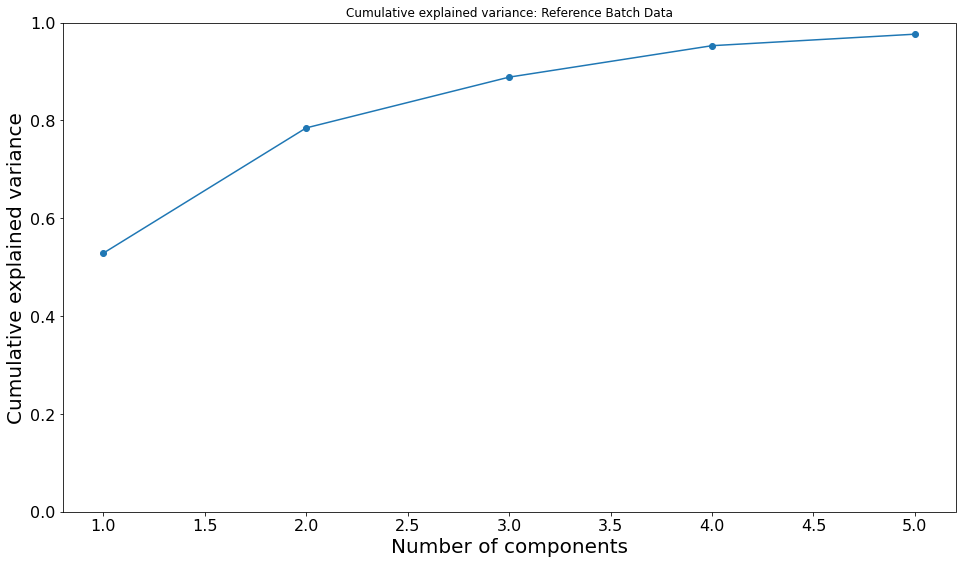

In [32]:
# plot the cumulative explained variance 
plt.plot(range(1,pca_reference.n_components+1), np.cumsum(pca_reference.explained_variance_ratio_),'-o')
# plot labelling
plt.xlabel('Number of components', fontsize=20)
plt.ylabel('Cumulative explained variance', fontsize=20);
plt.title("Cumulative explained variance: Reference Batch Data")
plt.tick_params(labelsize=16)
plt.ylim(0,1)
plt.show()

In [33]:
# get the cumulative variance explained by the PCs
np.cumsum(pca_reference.explained_variance_ratio_)

array([0.52860131, 0.78467377, 0.88843351, 0.95271965, 0.97625353])

In [34]:
# get the individual variance expalined by each PCs
pca_reference.explained_variance_ratio_

array([0.52860131, 0.25607245, 0.10375975, 0.06428613, 0.02353388])

Cumulatively variance explained
*   PC1 describes 52.860131%
*   PC2 describes 78.467377%
*   PC3 describes 88.843351%
*   PC4 describes 95.271965%
*   PC5 describes 97.625353%

Individual variance explained
*   PC1 describes 52.860131%
*   PC2 describes 25.607245%
*   PC3 describes 10.375975%
*   PC3 describes 6.428613%
*   PC3 describes 2.353388%

Together the first two principal components capture 78.467377% of the variance in the dataset. Individually PC1 captures 52.860131% or the variance and PC2 captures 25.607245% of the variance in the dataset.

## 2.2 Use the model to monitor running batches

### 2.2.1

In [35]:
todays_batches_df = pd.read_excel("todays_batches.xlsx")

In [36]:
todays_batches_df

,Unnamed: 0,Primary ID,BatchID,Time,Ethanol,Temperature,Molasses flow,NH3 flow,Air flow,Level,pH
0,2573,2574,Ya,0.000000,0.30350,29.0885,-0.70954,0.00356,1250.69,41.9216,4.86282
1,2574,2575,Ya,0.166667,0.41224,29.5509,-1.49002,0.00712,2040.08,41.9911,4.00324
2,2575,2576,Ya,0.333333,1.16614,29.9639,-1.63193,0.00712,2235.08,42.3624,4.05839
3,2576,2577,Ya,0.500000,2.22696,29.9746,1280.07000,82.08680,2419.08,42.8531,4.35465
4,2577,2578,Ya,0.666667,3.13590,29.9466,844.09600,74.65800,2603.53,43.2146,4.76967
...,...,...,...,...,...,...,...,...,...,...,...
161,2734,2735,Za,13.000000,0.01637,33.2882,301.55000,0.05000,6794.76,57.2191,6.38039
162,2735,2736,Za,13.166700,0.01575,33.3834,161.95900,0.04286,6820.50,57.2289,6.48979
163,2736,2737,Za,13.333300,0.01512,33.4438,75.58330,0.03214,6698.80,57.2021,6.55989
164,2737,2738,Za,13.500000,0.01444,33.4531,61.79870,0.06429,6775.14,57.0425,6.59559


In [37]:
# drop the columns not needed for PCA
todays_batches_PCA_df = todays_batches_df.drop(columns = ["Unnamed: 0","Primary ID","BatchID"])
# standardize the data
todays_batches_PCA_scaled_df = scaler_reference.transform(todays_batches_PCA_df)
# check mean at 0
todays_batches_PCA_scaled_df.mean(axis = 0)

array([-1.01658976e-16,  5.59434565e+00,  1.37218814e-01, -9.64710326e-01,
       -6.46978302e-01,  4.64164042e-01, -5.71951265e-02, -1.24028468e-01])

In [38]:
# check standard deviation equals 1
todays_batches_PCA_scaled_df.std(axis = 0)

array([1.        , 6.50966668, 1.00838517, 1.11829468, 0.86433342,
       1.28190742, 0.78172514, 1.0994502 ])

Todays batch data was standardized using the scaler for the reference data, hence the mean may not equal 0 and the standard deviation may not equal 1.

In [39]:
# run PCA
pca_todays_scores = pca_reference.transform(todays_batches_PCA_scaled_df)
# extract scores
scores_todays_pd = pd.DataFrame(data = pca_todays_scores
                         ,columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
                         ,index = todays_batches_df.index)
# view scores
scores_todays_pd

,PC1,PC2,PC3,PC4,PC5
0,-3.096781,3.798958,1.166746,0.602916,0.937231
1,-3.715861,3.216763,2.529801,-1.183846,0.839431
2,-3.928722,2.972255,1.411527,-2.217525,1.037556
3,-4.362027,1.145315,-0.230988,-2.807162,1.130690
4,-4.476710,1.268811,-2.409623,-3.259502,1.559791
...,...,...,...,...,...
161,4.177559,2.589581,-2.097027,0.924135,-0.524341
162,4.329929,2.726441,-2.361650,1.062921,-0.615614
163,4.401519,2.857172,-2.506579,1.158278,-0.667658
164,4.462603,2.853649,-2.596933,1.205385,-0.682489


Create score matrix for todays batch data using PCA model created from the reference data by applying the function transform.

In [40]:
# re-assign BatchID to the scores
scores_todays_pd["BatchID"] = todays_batches_df["BatchID"]
# re-assign Time to the scores
scores_todays_pd["Time"] = todays_batches_df["Time"]
# pivot the table with column BatchID and index Time
scores_todays_pivot_pd = scores_todays_pd.pivot_table(index = "Time", columns = "BatchID")
# view the pivot table
scores_todays_pivot_pd

PC1                 PC2  ...       PC4       PC5          
BatchID          Ya        Za        Ya  ...        Za        Ya        Za
Time                                     ...                              
0.000000  -3.096781 -0.660359  3.798958  ...  2.854773  0.937231 -0.030840
0.166667  -3.715861 -2.032155  3.216763  ...  1.492080  0.839431  0.011713
0.333333  -3.928722 -2.734359  2.972255  ... -0.031252  1.037556 -0.072634
0.500000  -4.362027 -2.523621  1.145315  ... -0.437946  1.130690 -0.224712
0.666667  -4.476710 -2.356751  1.268811  ... -0.325745  1.559791 -0.049787
...             ...       ...       ...  ...       ...       ...       ...
13.000000  1.684309  4.177559  1.398034  ...  0.924135  0.405520 -0.524341
13.166700  1.770673  4.329929  1.426290  ...  1.062921  0.421113 -0.615614
13.333300  1.869276  4.401519  1.470466  ...  1.158278  0.404415 -0.667658
13.500000  1.932977  4.462603  1.699221  ...  1.205385  0.316969 -0.682489
13.666700  1.646827  4.510675  2.394997  ...  1.236215  0.343897 -0.672140

[83 rows x 10 columns]

Create the pivot table for plotting

### 2.2.2

In [41]:
def myplot3(scores_today, scores,loadings,loading_labels=None,score_labels=None):
    # adjusting the scores to fit in (-1,1)
    # modified to work with pandas dataframe
    xt = scores.iloc[:,:16]
    yt = scores.iloc[:,16:32]
    n = loadings.shape[0]
    scalext = 1.0/(xt.max().max() - xt.min().min())
    scaleyt = 1.0/(yt.max().max() - yt.min().min())
    xt_scaled = xt * scalext
    yt_scaled = yt * scaleyt

    # adjusting the loadings to fit in (-1,1)
    p = loadings
    p_scaled = MaxAbsScaler().fit_transform(p)
    # modified to plot lines rather than text
    for j in range(xt_scaled.shape[1]):
      plt.plot(xt_scaled.iloc[:,j:j+1], yt_scaled.iloc[:,j:j+1])
    
    # adjust todays data with same scale as the referenced data
    xt_today = scores_today.iloc[:,:2]
    yt_today = scores_today.iloc[:,2:4]
    xt_today_scaled = xt_today * scalext
    yt_today_scaled = yt_today * scaleyt
    # plot scores from todays batches
    for j in range(xt_today.shape[1]):
      plt.plot(xt_today_scaled.iloc[:,j:j+1], yt_today_scaled.iloc[:,j:j+1],"--*", label = np.array(scores_todays_pivot_pd.columns)[j][1])
    plt.legend()

    for i in range(n):
        plt.arrow(0, 0, p_scaled[i,0], p_scaled[i,1], color = 'r',alpha = 0.5)
        if loading_labels is None:
            plt.text(p_scaled[i,0], p_scaled[i,1], "Var"+str(i+1), color = 'g', ha = 'center', va = 'center')
        else:
            plt.text(p_scaled[i,0], p_scaled[i,1], loading_labels[i], color = 'r', ha = 'center', va = 'center', size=16)
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.xlabel("PC{}".format(1), fontsize=20);
    plt.ylabel("PC{}".format(2), fontsize=20);
    plt.tick_params(labelsize=16)
    plt.grid()

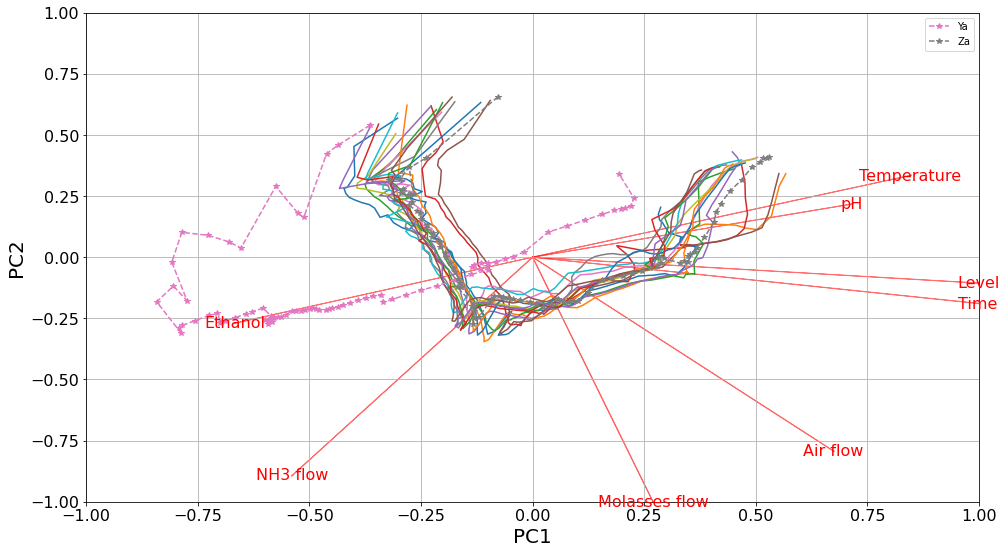

In [42]:
# set figure size
plt.rcParams["figure.figsize"] = [16,9]
# plot the results
myplot3(scores_todays_pivot_pd.iloc[:,:4],scores_reference_pivot_pd.iloc[:,:32],loadings_reference_pd.iloc[:,:2],loading_labels=loadings_reference_pd.index,score_labels=scores_reference_pivot_pd.index)
# show the plot
plt.show()

Since one of tooday's batch data is embedded in the reference batches when plotted, Asterisk marker was added to make the new batches more obvious for the viewer.

### 2.2.3

"Za" batch showed similar behaviour to the referene batches. All but one data point are within the domain range created by the reference batches; within the expected range of values.

"Ya" batch showed fairly different behaviour when compared to the reference batches. It has significantly high ethanol values throughout the process compared to the reference batches, hence an outlier that indicates potential problems with the chemical process.